In [92]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv('./Data_wolves_moose_Isle_Royale_June2019.csv', sep=';')
df['year']=pd.to_datetime(df['year'], format='%Y')
df

,year,wolves,moose,kill rate,predation rate,f (wolves),ancestry (immigrant wolf),Juvenile Survival,Adult Survival,overall survival (genetic-CR),...,"Apr-May (temp, F)","Jan-Feb (temp, F)","May-Aug (precip, inches)",NAO (DJFM - station based),NAO - annual,snow.depth (cm),"ice bridges (0=none, 1 = present)",springtime growing degree days,Unnamed: 33,Unnamed: 34
0,1959-01-01,20,538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"43,9","1,4","16,8","-0,37","1,83",NaN,0,N/A yet,NaN,NaN
1,1960-01-01,22,564,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"43,4","8,45","12,08","-1,54","-1,88",NaN,0,N/A yet,NaN,NaN
2,1961-01-01,22,572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"41,4","9,75","8,94","1,8","0,47",NaN,1,N/A yet,NaN,NaN
3,1962-01-01,23,579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"42,6","2,15","16,01","-2,38","-1,05",NaN,1,N/A yet,NaN,NaN
4,1963-01-01,20,596,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"43,5","-0,35","14,1","-3,6","-2,16",NaN,1,N/A yet,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2015-01-01,3,1250,"0,534","0,008","0,292","0,344",NaN,NaN,NaN,...,"44,65","3,85","15,5","3,56","4,09","18,898",1,N/A yet,NaN,NaN
57,2016-01-01,2,1300,"1,400","0,013","0,218","0,344",NaN,NaN,NaN,...,"44,2","11,95","15,62","0,98","1,7","25,998",0,N/A yet,NaN,NaN
58,2017-01-01,2,1600,"1,400","0,011","0,218","0,344",NaN,NaN,NaN,...,"43,85","15,4","16,12","1,47","1,14","16,201",0,N/A yet,NaN,NaN
59,2018-01-01,2,1475,"1,383","0,011","0,218","0,344",NaN,NaN,NaN,...,"42,7","6,05","13,05","0,3",NaN,"19,232",1,N/A yet,NaN,NaN


## Исходные данные

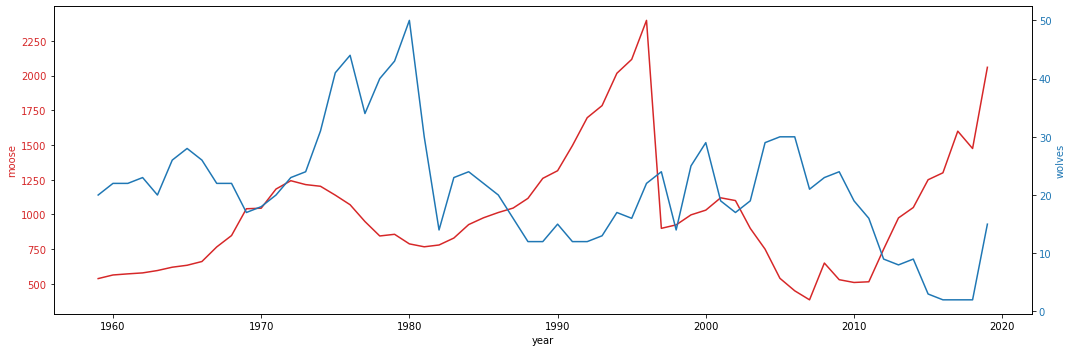

In [93]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(15,5)

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('year')
ax1.set_ylabel('moose', color=color)
ax1.plot(df['year'], df['moose'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('wolves', color=color)  # we already handled the x-label with ax1
ax2.plot(df['year'], df['wolves'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

## Модель Лотки-Вольтерры - дифференциальная эволюция

[0.71868271 6.56361404 8.65172846 0.02365424]


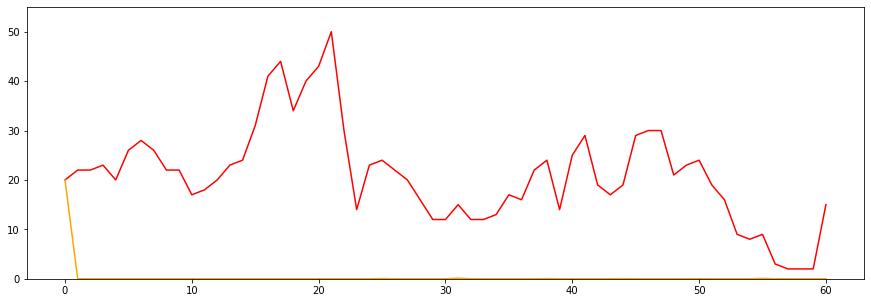

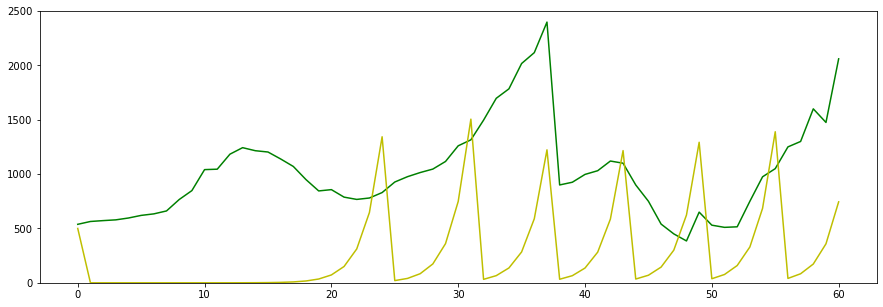

50.00000000000916
1733.3155495732535


In [94]:
x0,y0 = 500, 20

def f(params):    
    a, b, c, g = params
    def system(z,t):
       x,y=z[0],z[1]
       dxdt= x*(a-b*y)
       dydt=-y*(c-g*x)
       return [dxdt,dydt]    
    
    t=np.linspace(0,61,61)
    sol=odeint(system,[x0,y0],t)
    X,Y=sol.transpose()
    
    score=abs(max_error(df.moose, X))
    '''
    print(params)
    print(abs(max_error(df.wolves, Y)))
    print(abs(max_error(df.moose, X)))
    
    plt.plot(np.arange(len(Y)), df.wolves.tolist(), c='r')
    plt.plot(np.arange(len(Y)), Y, c='orange')
    plt.ylim(0, 55)
    plt.show()
    
    plt.plot(np.arange(len(Y)), df.moose.tolist(), c='g')
    plt.plot(np.arange(len(X)), X, c='y')
    plt.ylim(0, 2500)
    plt.show()
    '''   
    return score

bounds=[(0, 1), (3,10), (3,10), (0, 1)]

res = differential_evolution(f, bounds, maxiter=5)
p=res.x
print(p)

def system(z,t):
       x,y=z[0],z[1]
       dxdt= x*(a-b*y)
       dydt=-y*(c-g*x)
       return [dxdt,dydt]

a, b, c, g = p
x0,y0 = 500, 20

t=np.linspace(0,61,61)
sol=odeint(system,[x0,y0],t)
X,Y=sol.transpose()
#print(X)
#print(Y)
plt.plot(np.arange(len(Y)), df.wolves.tolist(), c='r')
plt.plot(np.arange(len(Y)), Y, c='orange')
plt.ylim(0, 55)
plt.show()

plt.plot(np.arange(len(Y)), df.moose.tolist(), c='g')
plt.plot(np.arange(len(X)), X, c='y')
plt.ylim(0, 2500)
plt.show()

print(abs(max_error(df.wolves, Y)))
print(abs(max_error(df.moose, X)))

## Модель Лотки-Вольтерры с логистической поправкой - дефолтные параметры для волков/лосей

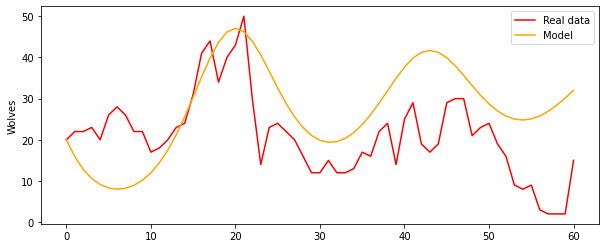

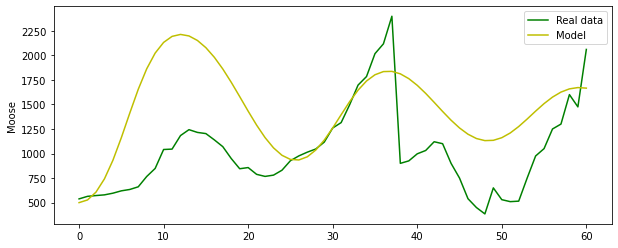

28.1351132252256
1174.7430514454234


In [95]:
import numpy as np
from scipy.integrate import odeint
plt.rcParams['figure.figsize']=(10,4)

def system(z,t):
    M, W=z[0],z[1]
    fMd = 0.5*M-0.00019*M**2-10*W
    fWd = -0.35*W+0.000245*M*W
    return np.array([fMd, fWd], float)

x0, y0 = 500, 20
    

t=np.linspace(0,61,61)
sol=odeint(system,[x0,y0],t)
X,Y=sol.transpose()

plt.plot(np.arange(len(Y)), df.wolves.tolist(), c='r', label='Real data')
plt.plot(np.arange(len(Y)), Y, c='orange', label='Model')
plt.ylabel('Wolves')
plt.legend()
plt.show()

plt.plot(np.arange(len(Y)), df.moose.tolist(), c='g', label='Real data')
plt.plot(np.arange(len(X)), X, c='y', label='Model')
plt.ylabel('Moose')
plt.legend()
plt.show()

print(abs(max_error(df.wolves, Y)))
print(abs(max_error(df.moose, X)))

## Модель Лотки-Вольтерры с логистической поправкой - дифференциальная эволюция

[4.52942544e-01 2.03639787e-04 8.89988065e+00 3.63602365e-01
 3.20940406e-04]


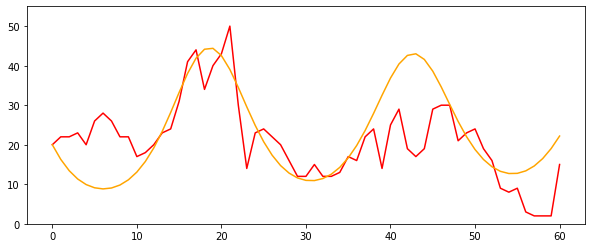

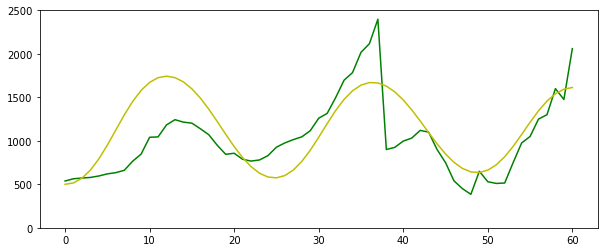

26.00136667512173
732.4094990121871


In [96]:
from scipy.optimize import minimize, differential_evolution, brute
from sklearn.metrics import max_error, r2_score

M, W = 500, 20
def f(params):
    a, b, c, g, h = params
    def system(z,t):
        M, W=z   
        fMd = a*M-b*M**2-c*W
        fWd = -g*W+h*M*W
        return np.array([fMd, fWd], float)      
    
    t=np.linspace(0,61,61)
    sol=odeint(system,[M, W],t)
    X,Y=sol.transpose()
    
    score=abs(max_error(df.moose, X))
    '''
    print(params)
    print(abs(max_error(df.wolves, Y)))
    print(abs(max_error(df.moose, X)))
    
    plt.plot(np.arange(len(Y)), df.wolves.tolist(), c='r')
    plt.plot(np.arange(len(Y)), Y, c='orange')
    plt.ylim(0, 55)
    plt.show()
    
    plt.plot(np.arange(len(Y)), df.moose.tolist(), c='g')
    plt.plot(np.arange(len(X)), X, c='y')
    plt.ylim(0, 2500)
    plt.show()
    '''   
    return score

x0=[0.38, 0.000178, 6.593, -0.25, 0.000230]
#x0=[0.5, 0.00019, 10, 0.35, 0.000245]

bounds=[(0.5-0.135, 0.5+0.135), (0.00019-0.0002, 0.00019+0.0002), (10-2.215, 10+2.21), 
        (0.35-0.117, 0.35+0.117), (0.000245-0.000107, 0.000245+0.000107)]

res = differential_evolution(f, bounds, maxiter=5)
p=res.x
print(p)

a, b, c, g, h = p
M, W = 500, 20

def system(z,t):
    M, W=z[0],z[1]    
    fMd = a*M-b*M**2-c*W
    fWd = -g*W+h*M*W
    return np.array([fMd, fWd], float)    

t=np.linspace(0,61,61)
sol=odeint(system,[M, W],t)
X,Y=sol.transpose()
#print(X)
#print(Y)
plt.plot(np.arange(len(Y)), df.wolves.tolist(), c='r')
plt.plot(np.arange(len(Y)), Y, c='orange')
plt.ylim(0, 55)
plt.show()

plt.plot(np.arange(len(Y)), df.moose.tolist(), c='g')
plt.plot(np.arange(len(X)), X, c='y')
plt.ylim(0, 2500)
plt.show()

print(abs(max_error(df.wolves, Y)))
print(abs(max_error(df.moose, X)))

## Модель Лотки-Вольтерры с логистической поправкой - перебор "грубой силой"

[4.84170683e-01 2.26983669e-04 7.96258612e+00 3.27217375e-01
 3.10448519e-04]


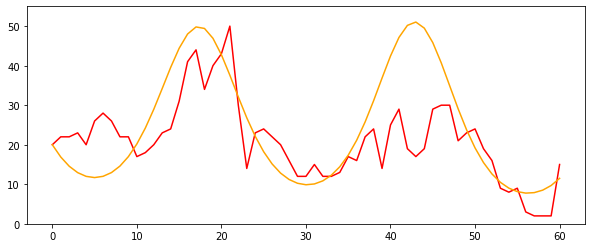

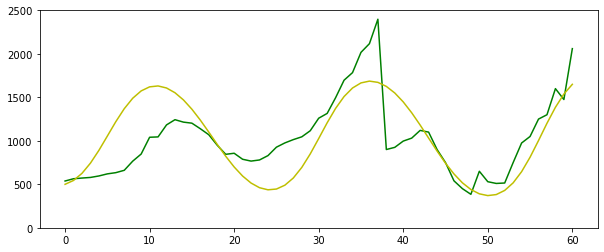

34.03325137000562
725.7933437980519


In [98]:
from scipy import optimize

M, W = 500, 20
def f(params):
    a, b, c, g, h = params
    def system(z,t):
        M, W=z   
        fMd = a*M-b*M**2-c*W
        fWd = -g*W+h*M*W
        return np.array([fMd, fWd], float)      
    
    t=np.linspace(0,61,61)
    sol=odeint(system,[M, W],t)
    X,Y=sol.transpose()
    
    score=score=abs(max_error(df.moose, X))
    '''
    print(params)    
    print(abs(max_error(df.wolves, Y)))
    print(abs(max_error(df.moose, X)))
    
    plt.plot(np.arange(len(Y)), df.wolves.tolist(), c='r')
    plt.plot(np.arange(len(Y)), Y, c='orange')
    plt.ylim(0, 55)
    plt.show()
    
    plt.plot(np.arange(len(Y)), df.moose.tolist(), c='g')
    plt.plot(np.arange(len(X)), X, c='y')
    plt.ylim(0, 2500)
    plt.show()
    '''
    return score

#x0=[0.38, 0.000178, 6.593, -0.25, 0.000230]
x0=[0.5, 0.00019, 10, 0.35, 0.000245]

rranges = (slice(0.48, 0.51, 0.005), slice(0.00010, 0.00026, 0.00002), slice(8, 12, 0.5),
           slice(0.34, 0.36, 0.005), slice(0.00022, 0.00030, 0.00002))

res = optimize.brute(f, rranges, finish=optimize.fmin)
p=res
print(p)

a, b, c, g, h = p
M, W = 500, 20

def system(z,t):
    M, W=z[0],z[1]
    fMd = a*M-b*M**2-c*W
    fWd = -g*W+h*M*W
    return np.array([fMd, fWd], float)    

t=np.linspace(0,61,61)
sol=odeint(system,[M, W],t)
X,Y=sol.transpose()

plt.plot(np.arange(len(Y)), df.wolves.tolist(), c='r')
plt.plot(np.arange(len(Y)), Y, c='orange')
plt.ylim(0, 55)
plt.show()

plt.plot(np.arange(len(Y)), df.moose.tolist(), c='g')
plt.plot(np.arange(len(X)), X, c='y')
plt.ylim(0, 2500)
plt.show()

print(abs(max_error(df.wolves, Y)))
print(abs(max_error(df.moose, X)))